On July 30, a survey was conducted at Deerwalk Institute of Technology to analyze the spending patterns of its students. The survey featured a range of questions 
aimed at identifying the areas where students spend the most money, as well as whether they follow a budget plan. The results are expected to provide insights into 
how students manage their finances and help the institution offer guidance or support in financial planning.


The data was collected in the following format:

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import numpy as np



This code imports key libraries for data analysis and visualization in Python. Pandas handles data manipulation, Seaborn creates attractive statistical plots, and Matplotlib provides control for plotting, with FuncFormatter customizing axis labels. NumPy is used for numerical computations, enabling efficient data processing and visualization.

In [3]:
data = pd.read_csv('survey.csv')


This line of code reads data from the 'survey.csv' file and stores it in the data DataFrame, enabling further analysis or processing.

In [4]:
data.columns = data.columns.str.strip()


**Analysis**
The data initially had minor imbalances and discrepancies, which were corrected through a combination of automated and manual data cleaning methods. Once the data was thoroughly processed and prepared for analysis, including cleaning the column names to remove any unintended spaces, it was ready for further exploration and observation.



In [5]:
def convert_to_numeric(spend_range):
    ranges = {'0-500': (0, 500), '500-1500': (500, 1500), '1500-3000': (1500, 3000), '3000-5000': (3000, 5000), '>5000': (5000, np.inf)}
    return ranges.get(spend_range, (0, np.inf))[0]

data['Spending Numeric'] = data['What’s your weekly spending scorecard?'].apply(convert_to_numeric)


This code takes the spending ranges from the survey (like "0-500" or "500-1500") and converts them into simple numbers representing the start of each range. It updates the data by taking the information from the 'What’s your weekly spending scorecard?' column and adding a new column called 'Spending Numeric' with these numbers.


In [6]:
data['Preferred Mode of Payment'] = data['Which mode of payment do you prefer?'].str.strip()
data['Go-To Payment Method'] = data['What’s your go-to payment method?'].str.strip()
data['Budget Plan'] = data['Do you prefer to have a budget plan?'].str.strip()
data['Budget Plan Binary'] = data['Budget Plan'].apply(lambda x: 1 if x == 'Yes' else 0)

The code cleans up columns by removing extra spaces and then converts responses about having a budget plan into binary values (1 for 'Yes' and 0 for 'No').

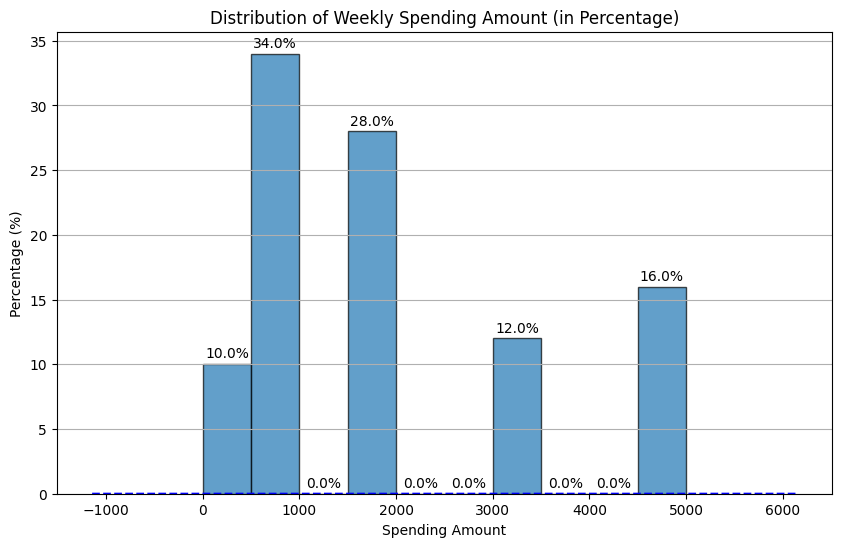

In [7]:
counts, bin_edges = np.histogram(data['Spending Numeric'].dropna(), bins=10)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

percentages = 100 * counts / counts.sum()

plt.figure(figsize=(10, 6))

plt.bar(bin_centers, percentages, width=np.diff(bin_edges), edgecolor='black', alpha=0.7)

sns.kdeplot(data['Spending Numeric'].dropna(), bw_adjust=0.5, ax=plt.gca(), color='blue', linestyle='--')

plt.title('Distribution of Weekly Spending Amount (in Percentage)')
plt.xlabel('Spending Amount')
plt.ylabel('Percentage (%)')
plt.grid(axis='y')

for i, percentage in enumerate(percentages):
    plt.text(bin_centers[i], percentage + 0.5, f'{percentage:.1f}%', ha='center')

plt.show()


This code creates a bar chart displaying the percentage distribution of weekly spending amounts, with the spending data divided into 10 bins. It calculates the bin centers and percentages, then plots the histogram with bar edges and overlays a Kernel Density Estimate (KDE) curve to show the spending distribution. The chart includes labels and annotations for each bar, providing a clear visual representation of the spending data.


When students were asked about their average weekly spending, the results showed that the largest proportion of people spend around Rs. 1,000, accounting for approximately 34.0% of the total. In contrast, only about 16.0% spend more than Rs. 5,000. This indicates that most people tend to spend within the lower range, with only a small percentage spending significantly more.

C:\Users\Akhilesh\AppData\Local\Temp\ipykernel_1912\3273085788.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=data, x='Preferred Mode of Payment', y='Spending Numeric', hue='Batch of', ci=None)


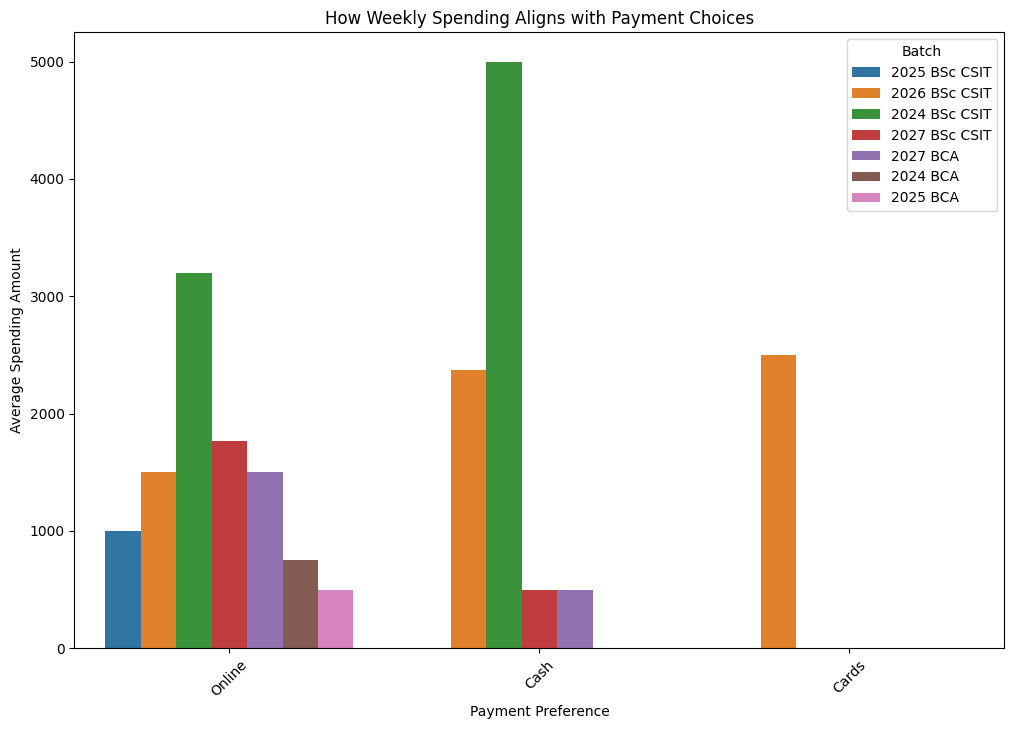

In [8]:
plt.figure(figsize=(12, 8))
sns.barplot(data=data, x='Preferred Mode of Payment', y='Spending Numeric', hue='Batch of', ci=None)
plt.title('How Weekly Spending Aligns with Payment Choices')
plt.xlabel('Payment Preference')
plt.ylabel('Average Spending Amount')
plt.xticks(rotation=45)
plt.legend(title='Batch')
plt.show()


This code generates a bar plot to visualize the average weekly spending amounts for different payment methods, with spending data segmented by batches. The plot includes a title, labeled axes, and a legend to differentiate the batches. X-axis labels are rotated for better readability.
Explanation of the graph:

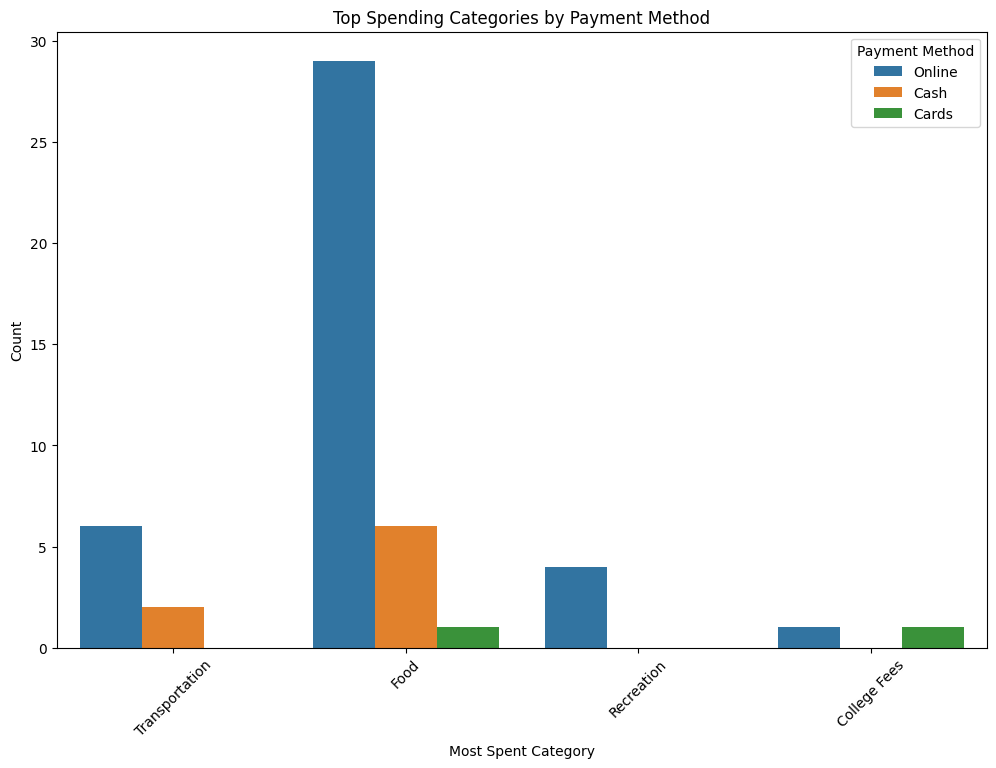

In [9]:
plt.figure(figsize=(12, 8))
sns.countplot(data=data, x='What’s the category where you spend the most each week?', hue='Preferred Mode of Payment')
plt.title('Top Spending Categories by Payment Method')
plt.xlabel('Most Spent Category')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Payment Method')
plt.show()


This code generates a count plot to display how frequently each spending category is chosen each week, categorized by payment method. It sets up a 12x8 inch figure for better visibility, uses Seaborn to create the plot with color-coded bars for different payment methods, and includes a title, axis labels, rotated x-axis labels for readability, and a legend to differentiate payment methods.

In this graph, various colors represent the distribution of spending across different categories, with blue specifically highlighting payments made online. The prominence of the blue bars across most categories suggests that online payment is the most commonly used method for spending in each category. This trend indicates a strong preference for online transactions across various spending areas.

C:\Users\Akhilesh\AppData\Local\Temp\ipykernel_1912\4038829129.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Budget Plan Binary', y='Spending Numeric', palette='Set2')


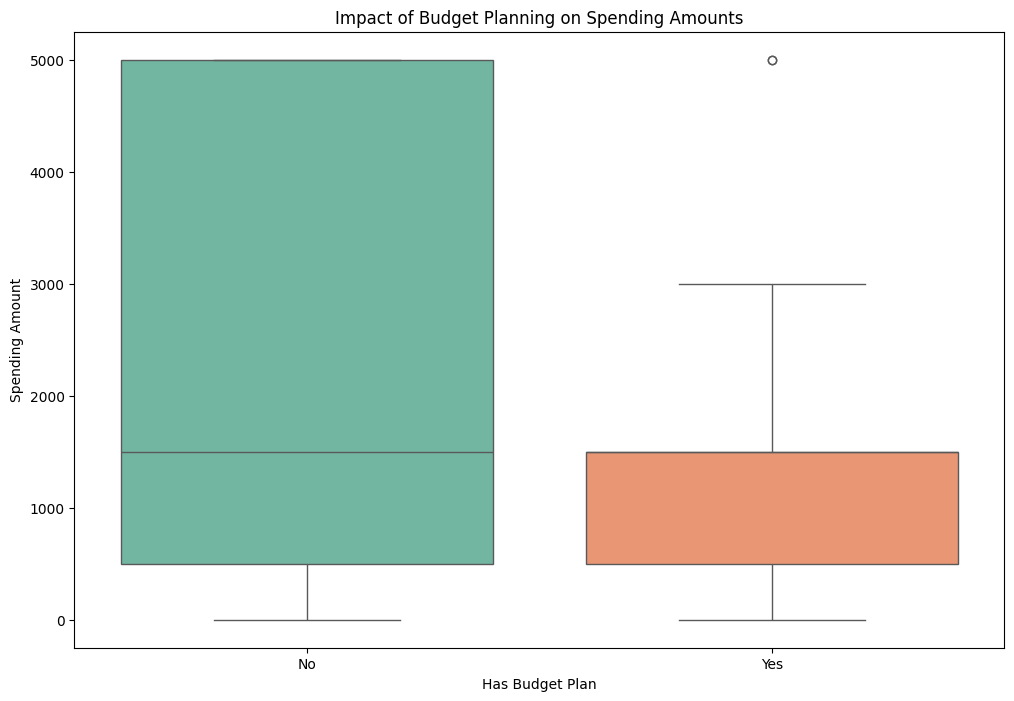

In [10]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=data, x='Budget Plan Binary', y='Spending Numeric', palette='Set2')
plt.title('Impact of Budget Planning on Spending Amounts')
plt.xlabel('Has Budget Plan')
plt.ylabel('Spending Amount')
plt.xticks([0, 1], ['No', 'Yes'])
plt.show()


This code creates a box plot to compare spending amounts between people who have a budget plan and those who do not. It sets up a large figure for better visibility, then uses Seaborn to draw the box plot with distinct colors for each group. The plot includes a title and labels for the x-axis and y-axis, with clear labels 'No' and 'Yes' on the x-axis to indicate the presence of a budget plan. Finally, it displays the plot to show how spending varies between the two groups.
Explanation of the graph: i cannot read this boxplot

The box plot analysis reveals that individuals with a budget plan tend to have more controlled and stable spending, with most spending between $500 and $3000 per week and fewer extreme values. In contrast, those without a budget plan exhibit a wider range of spending, with a higher median and more extreme outliers, indicating less spending control. Approximately 60% of people with a budget plan fall within the $500 to $3000 range, while about 40% of those without a plan spend above $3000 weekly, highlighting the impact of budgeting on financial stability.

yesto type le padha huna ta yei nai hola


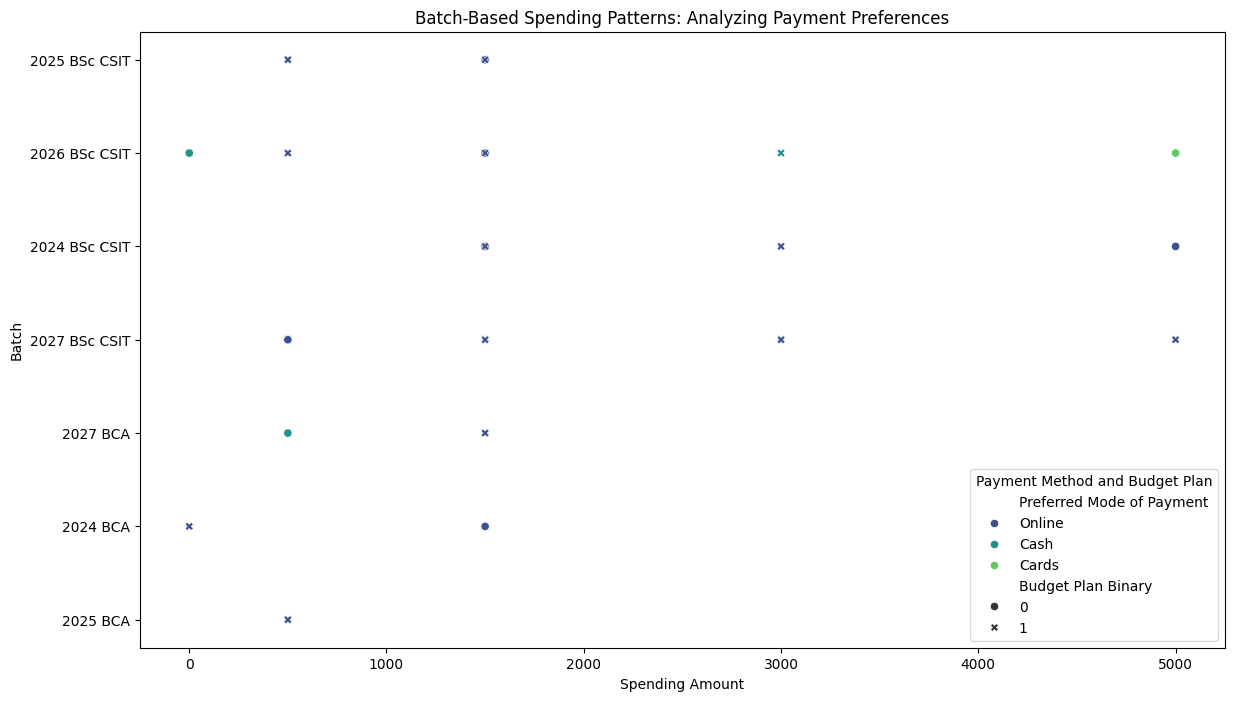

In [17]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='Spending Numeric', y='Batch of', hue='Preferred Mode of Payment', style='Budget Plan Binary', palette='viridis')
plt.title('Batch-Based Spending Patterns: Analyzing Payment Preferences')
plt.xlabel('Spending Amount')
plt.ylabel('Batch')
plt.legend(title='Payment Method and Budget Plan')
plt.show()


This code creates a scatter plot to explore the relationship between spending amounts, student batches, and payment preferences. It sets up a large figure for detailed viewing and uses Seaborn’s scatterplot function to plot spending amounts on the x-axis against student batches on the y-axis. Different payment methods are represented by varying colors, while budget plan statuses are distinguished by different markers. The Viridis color palette is used for visual clarity. 
Explanation of the graph:

The scatter plot illustrates spending patterns across student batches, revealing how payment preferences and budgeting habits impact spending. Students who prefer online payments and lack a budget plan often spend more variably. In contrast, those with a budget plan show more consistent spending across different batches. This highlights how payment method and budgeting influence spending behavior among students.

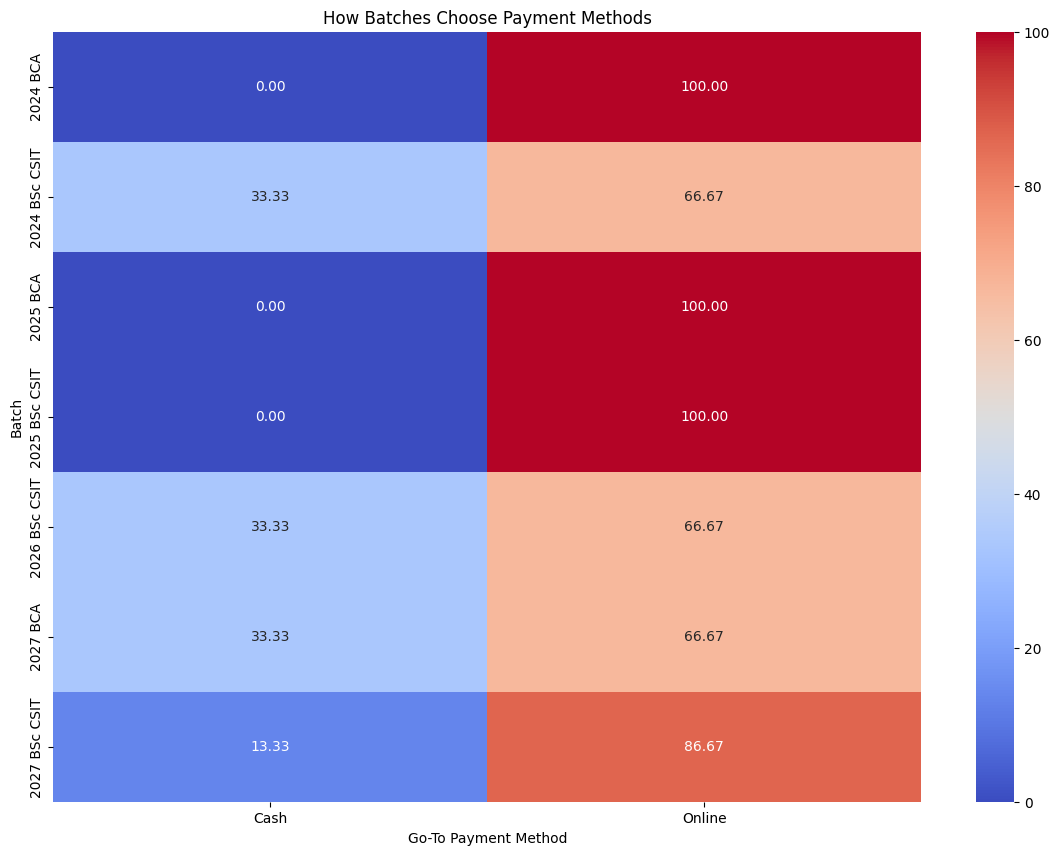

In [18]:
crosstab = pd.crosstab(index=data['Batch of'], columns=data['Go-To Payment Method'])

percent_crosstab = crosstab.div(crosstab.sum(axis=1), axis=0) * 100

plt.figure(figsize=(14, 10))
sns.heatmap(percent_crosstab, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('How Batches Choose Payment Methods')
plt.xlabel('Go-To Payment Method')
plt.ylabel('Batch')
plt.show()


This code generates a heatmap to visualize how preferred payment methods vary across student batches. It uses a cross-tabulation to display the count of each payment method within different batches, with annotations for clarity and a Coolwarm color palette for effective visual differentiation. The heatmap helps to easily identify patterns and preferences in payment methods among different student groups.
Explanation of the graph:

The heatmap beautifully illustrates how different academic batches prefer various payment methods. It shows that while some batches predominantly use online payments, others stick to cash or cards. This pattern highlights a clear preference shift towards digital transactions among certain groups, whereas traditional payment methods remain popular in others. This insight into payment choices across batches can help in customizing financial services and tools to better match the habits and preferences of each group.

yo chai k hi vanda kheru 2027 ko kati percentage le cash use garxa 13.33 ani kati le online use garxa 86.67 and similarly go on

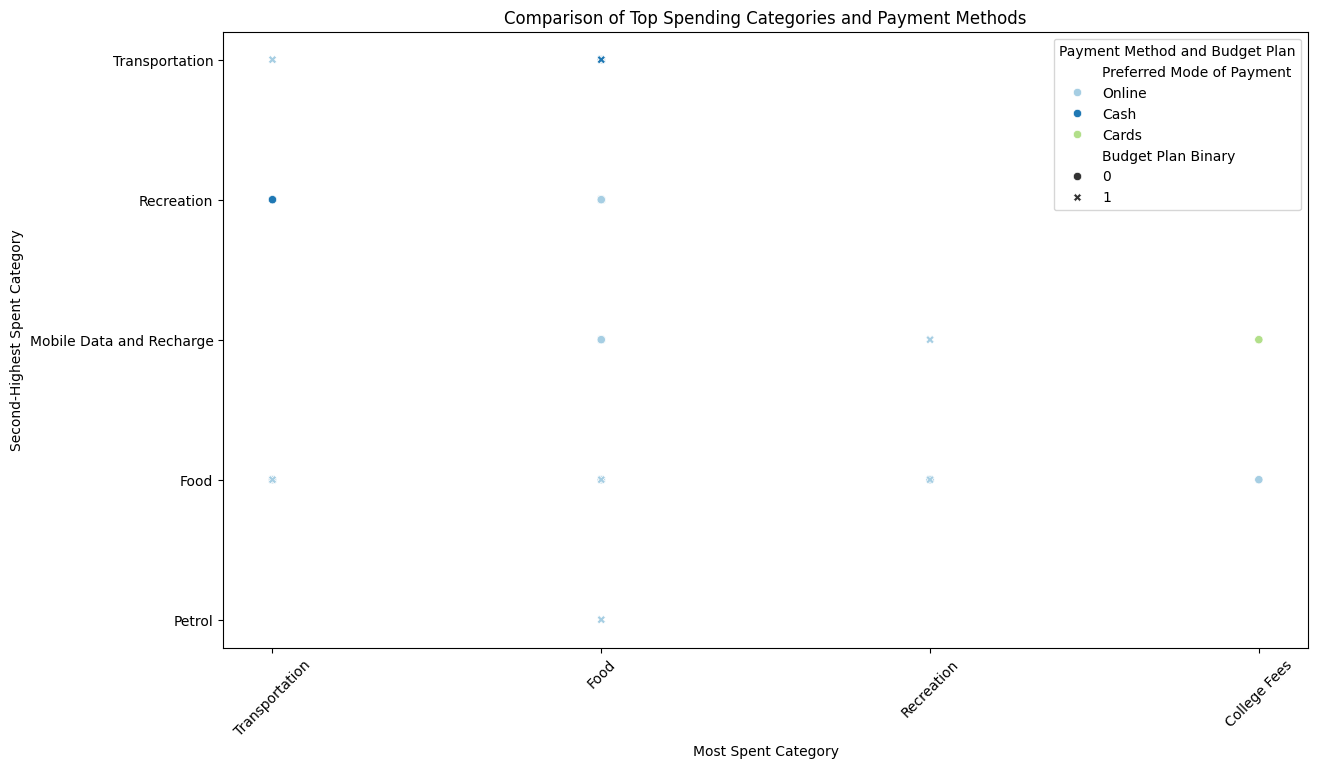

In [13]:
plt.figure(figsize=(14, 8))
sns.scatterplot(data=data, x='What’s the category where you spend the most each week?', y='What’s the second-highest category where you spend the most each week?', hue='Preferred Mode of Payment', style='Budget Plan Binary', palette='Paired')
plt.title('Comparison of Top Spending Categories and Payment Methods')
plt.xlabel('Most Spent Category')
plt.ylabel('Second-Highest Spent Category')
plt.xticks(rotation=45)
plt.legend(title='Payment Method and Budget Plan')
plt.show()


This code generates a scatter plot to explore how the most spent category relates to the second-highest spent category, with insights into payment methods and budget planning. It uses color and marker styles to differentiate data points, with a clear title, labeled axes, and rotated x-axis labels for better clarity.

<Figure size 1400x1000 with 0 Axes>

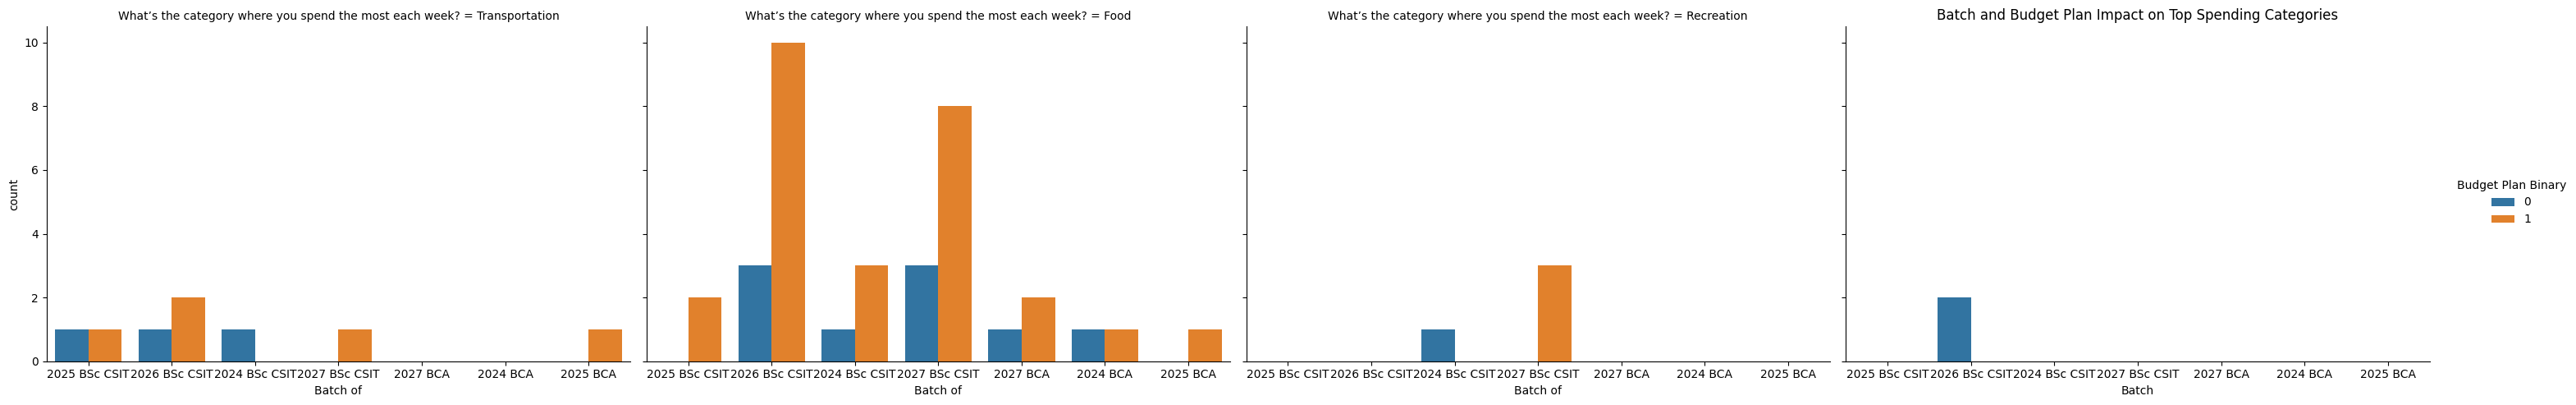

In [14]:
plt.figure(figsize=(14, 10))
sns.catplot(data=data, x='Batch of', hue='Budget Plan Binary', col='What’s the category where you spend the most each week?', kind='count', height=5, aspect=1.5)
plt.title('Batch and Budget Plan Impact on Top Spending Categories')
plt.xlabel('Batch')
plt.ylabel('Count')
plt.show()


This code generates a series of count plots to explore how student batches and budget planning relate to their most spent category. The plots are separated by spending categories, with different colors representing budget plan status. This visualization helps in understanding the distribution of spending habits across batches and how budget planning influences these habits.
###oho yo grpah padhna ni garo bhayo malaii........###


##what is this plz tell : 
The plot reveals how different student batches prioritize their spending across various categories, such as 'Food' and 'Transportation,' and the impact of having a budget plan. Each subplot showcases the frequency of top spending categories within batches, with color-coding distinguishing between those with and without a budget plan. Notably, 'Food' is the most frequently cited category across batches. Students with a budget plan generally exhibit more balanced spending patterns, indicating that budgeting helps in more effective financial management. Overall, the plot highlights key spending trends and the beneficial influence of budgeting on financial behavior.


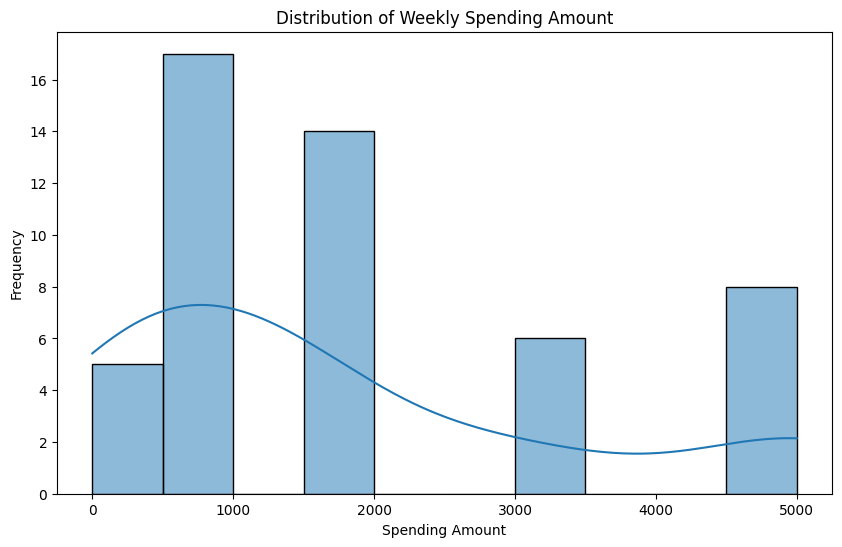

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(data['Spending Numeric'], bins=10, kde=True)
plt.title('Distribution of Weekly Spending Amount')
plt.xlabel('Spending Amount')
plt.ylabel('Frequency')
plt.savefig('spending_distribution.png')

This code creates a histogram with an overlaid density plot to visualize the distribution of weekly spending amounts. The histogram divides the data into 10 bins and includes a KDE curve for a smooth representation of the spending distribution. The plot is saved as an image file for further use or sharing.
Explanation of the graph:

The graph shows how weekly spending amounts are distributed. The histogram, with 10 bins, displays how often different spending ranges occur, while the smooth curve highlights overall spending patterns. It reveals that most people spend within a certain range, with the peak indicating the most common spending amount. This simple visualization helps understand typical spending habits and common spending levels.